# Produce absorption profile pattern
=======================================================================

- Sylvie Dagoret-Campagne
- affliliation : IJCLAB/IN2P3/CNRS
- creation date :  21 April 2020
- update :  24 April 2020 : Separate NO2 and O2


Make absorption patterns from libratran files

- Input : libradtran simulation profiles for airmass from 1 to 2.5 in **hitran_out/**

- Output : the absorption profile pattern in files : **absorption_pattern.csv**	, **absorption_pattern.fits**			

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
import numpy as np
from os import listdir
import re

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [4]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(12,6)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

In [5]:
from astropy.table import Table

In [6]:
import pandas as pd

In [7]:
import time
from datetime import datetime,date
import dateutil.parser

In [8]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

# Configuration

## Output file

In [9]:
file_out_basename="absorption_pattern"

## Directories

In [10]:
TOPDIR="libradtran_out"
SUBDIR=["atm_abs_o2","atm_abs_o2o3","atm_abs_o2h2o"]

# Read files

## Pure O2 and NO2 profile

In [11]:
dir=os.path.join(TOPDIR,SUBDIR[0])

In [12]:
listoffiles=os.listdir(dir)

In [13]:
listoffiles_sorted=sorted(listoffiles)

In [14]:
listoffiles_sorted

['RT_MPL_pp_us_ab_rtvis_z10_wv0_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z11_wv0_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z12_wv0_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z13_wv0_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z14_wv0_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z15_wv0_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z16_wv0_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z17_wv0_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z18_wv0_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z19_wv0_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z20_wv0_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z21_wv0_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z22_wv0_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z23_wv0_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z24_wv0_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z25_wv0_oz0_cld0000.OUT']

In [15]:
all_wl=[]
all_transmo2=[]
index=0
for thefile in listoffiles_sorted:
    data = np.loadtxt(os.path.join(dir,thefile))
    wl = data[:,0]
    atm = data[:,1] 
    all_transmo2.append(atm)
    all_wl.append(wl)
    index+=1

## Decode airmass number

In [16]:
tag="^RT_MPL_pp_us_ab_rtvis_z([0-9]+)_*"

In [17]:
str_num= [re.findall(tag,filename)[0] for filename in listoffiles_sorted]

In [18]:
print(str_num)

['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']


## O3 profile

In [19]:
dir=os.path.join(TOPDIR,SUBDIR[1])

In [20]:
listoffiles=os.listdir(dir)

In [21]:
listoffiles_sorted=sorted(listoffiles)

In [22]:
listoffiles_sorted

['RT_MPL_pp_us_ab_rtvis_z10_wv0_oz30_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z11_wv0_oz30_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z12_wv0_oz30_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z13_wv0_oz30_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z14_wv0_oz30_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z15_wv0_oz30_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z16_wv0_oz30_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z17_wv0_oz30_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z18_wv0_oz30_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z19_wv0_oz30_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z20_wv0_oz30_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z21_wv0_oz30_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z22_wv0_oz30_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z23_wv0_oz30_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z24_wv0_oz30_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z25_wv0_oz30_cld0000.OUT']

In [23]:
all_wl=[]
all_transmo3=[]
index=0
for thefile in listoffiles_sorted:
    data = np.loadtxt(os.path.join(dir,thefile))
    wl = data[:,0]
    atm = data[:,1] 
    atmo3 = atm/all_transmo2[index]
    all_transmo3.append(atmo3)
    all_wl.append(wl)
    index+=1

## PWV profile

In [24]:
dir=os.path.join(TOPDIR,SUBDIR[2])

In [25]:
listoffiles=os.listdir(dir)

In [26]:
listoffiles_sorted=sorted(listoffiles)

In [27]:
listoffiles_sorted

['RT_MPL_pp_us_ab_rtvis_z10_wv40_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z11_wv40_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z12_wv40_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z13_wv40_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z14_wv40_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z15_wv40_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z16_wv40_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z17_wv40_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z18_wv40_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z19_wv40_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z20_wv40_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z21_wv40_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z22_wv40_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z23_wv40_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z24_wv40_oz0_cld0000.OUT',
 'RT_MPL_pp_us_ab_rtvis_z25_wv40_oz0_cld0000.OUT']

In [28]:
all_wl=[]
all_transmh2o=[]
index=0
for thefile in listoffiles_sorted:
    data = np.loadtxt(os.path.join(dir,thefile))
    wl = data[:,0]
    atm = data[:,1] 
    atmh2o = atm/all_transmo2[index]
    all_transmh2o.append(atmh2o)
    all_wl.append(wl)
    index+=1

# Plot atmospheric profiles

In [29]:
NBOBS=len(all_transmo2)

In [30]:
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBOBS)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange( NBOBS), alpha=1)

## Profile for O2

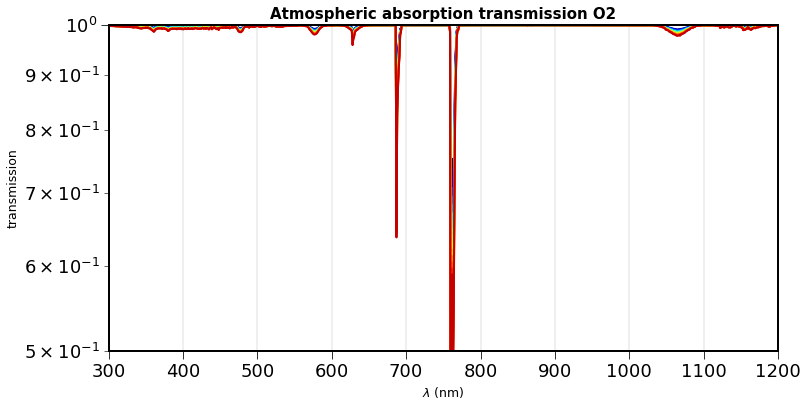

In [31]:
for index in np.arange(NBOBS):   
    plt.plot(wl,all_transmo2[index],'-',color=all_colors[index])
plt.xlim(300,1200)
plt.grid()
plt.title("Atmospheric absorption transmission O2")
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("transmission")
plt.ylim(0.5,1)
plt.yscale("log")
figname=string_date+"_O2abstransmission.png"
plt.savefig(figname)

## Separate O2 and NO2

In [32]:
WLMINO2=600
WLMAXO2=800
WLMINNO2=300
WLMAXNO2=600

In [33]:
all_transmno2=all_transmo2

In [34]:
clean_index_in_o2=np.where(np.logical_or(wl<WLMINO2,wl>WLMAXO2))[0]
keep_index_in_o2=np.where(np.logical_and(wl>WLMINO2,wl<WLMAXO2))[0]
clean_index_in_no2=np.where(wl>WLMAXNO2)[0]

In [35]:
all_transm_no2_clean=[]
all_transm_o2_clean=[]

for index in np.arange(NBOBS): 
    transm_o2=np.copy(all_transmo2[index])
    transm_no2=np.copy(all_transmo2[index])
    transm_o2[clean_index_in_o2]=1
    transm_no2[clean_index_in_no2]=1
    all_transm_no2_clean.append(transm_no2)
    all_transm_o2_clean.append(transm_o2)


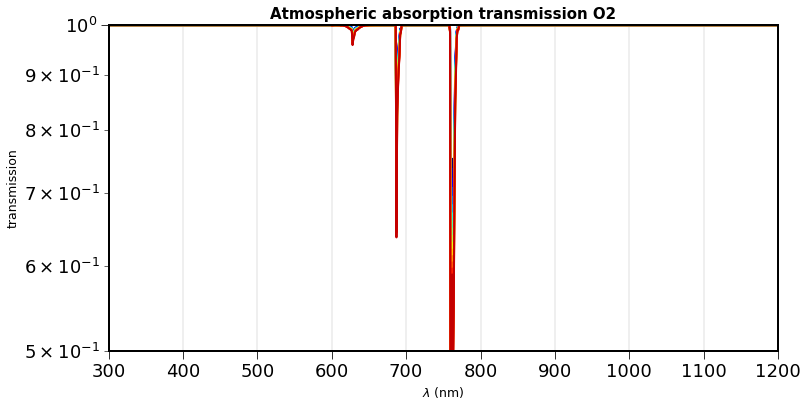

In [36]:
for index in np.arange(NBOBS):   
    plt.plot(wl,all_transm_o2_clean[index],'-',color=all_colors[index])
plt.xlim(300,1200)
plt.grid()
plt.title("Atmospheric absorption transmission O2")
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("transmission")
plt.ylim(0.5,1)
plt.yscale("log")
figname=string_date+"_O2abstransmission.png"
plt.savefig(figname)

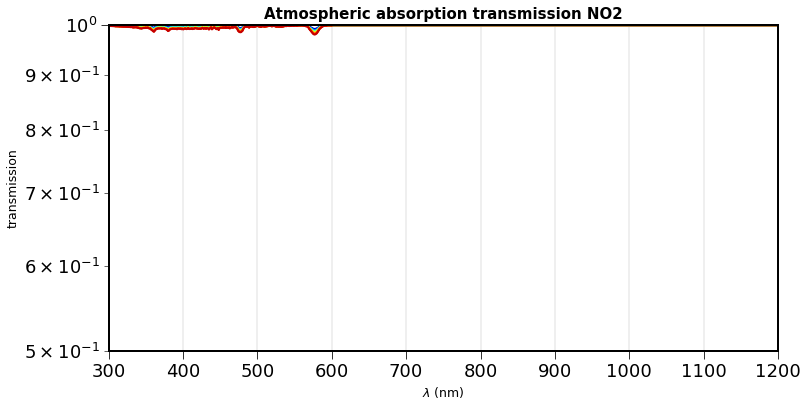

In [37]:
for index in np.arange(NBOBS):   
    plt.plot(wl,all_transm_no2_clean[index],'-',color=all_colors[index])
plt.xlim(300,1200)
plt.grid()
plt.title("Atmospheric absorption transmission NO2")
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("transmission")
plt.ylim(0.5,1)
plt.yscale("log")
figname=string_date+"_NO2abstransmission.png"
plt.savefig(figname)

## Profile for O3

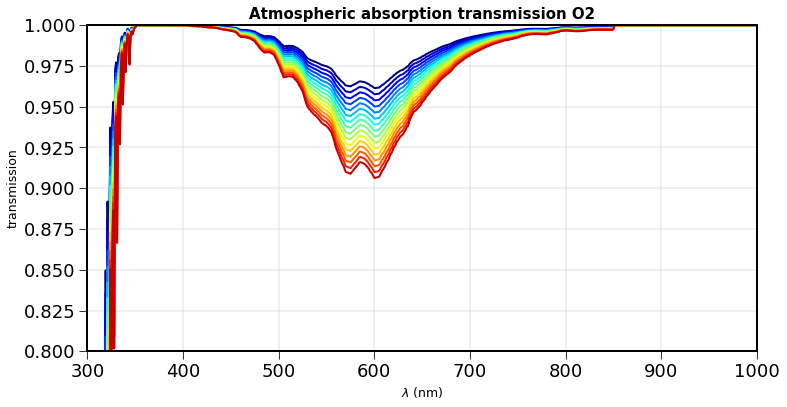

In [38]:
for index in np.arange(NBOBS):   
    plt.plot(wl,all_transmo3[index],'-',color=all_colors[index])
plt.xlim(300,1000)
plt.grid()
plt.title("Atmospheric absorption transmission O2")
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("transmission")
plt.ylim(0.8,1)
figname=string_date+"_O3abstransmission.png"
plt.savefig(figname)

## Profile for PWV

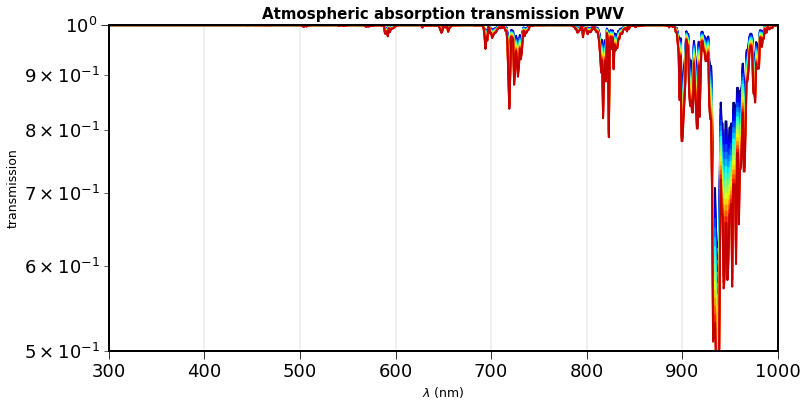

In [39]:
for index in np.arange(NBOBS):   
    plt.plot(wl,all_transmh2o[index],'-',color=all_colors[index])
plt.xlim(300,1000)
plt.yscale("log")
plt.grid()
plt.title("Atmospheric absorption transmission PWV")
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("transmission")
plt.ylim(0.5,1)
figname=string_date+"_H2Oabstransmission.png"
plt.savefig(figname)

# Save into a file

In [40]:
t = Table()

In [41]:
df = pd.DataFrame()

In [42]:
t["wl"]=wl
df["wl"]=wl

In [43]:
for index in np.arange(NBOBS):  
    strcol="o2_"+str_num[index]
    t[strcol]=all_transm_o2_clean[index]
    df[strcol]=all_transm_o2_clean[index]
    t[strcol].info.format ='1.6f'

In [44]:
for index in np.arange(NBOBS):  
    strcol="o3_"+str_num[index]
    t[strcol]=all_transmo3[index]
    df[strcol]=all_transmo3[index]
    t[strcol].info.format ='1.6f'

In [45]:
for index in np.arange(NBOBS):  
    strcol="h2o_"+str_num[index]
    t[strcol]=all_transmh2o[index]
    df[strcol]=all_transmh2o[index]
    t[strcol].info.format ='1.6f'

In [46]:
for index in np.arange(NBOBS):  
    strcol="no2_"+str_num[index]
    t[strcol]=all_transm_no2_clean[index]
    df[strcol]=all_transm_no2_clean[index]
    t[strcol].info.format ='1.6f'

In [47]:
t.show_in_notebook()

idx,wl,o2_10,o2_11,o2_12,o2_13,o2_14,o2_15,o2_16,o2_17,o2_18,o2_19,o2_20,o2_21,o2_22,o2_23,o2_24,o2_25,o3_10,o3_11,o3_12,o3_13,o3_14,o3_15,o3_16,o3_17,o3_18,o3_19,o3_20,o3_21,o3_22,o3_23,o3_24,o3_25,h2o_10,h2o_11,h2o_12,h2o_13,h2o_14,h2o_15,h2o_16,h2o_17,h2o_18,h2o_19,h2o_20,h2o_21,h2o_22,h2o_23,h2o_24,h2o_25,no2_10,no2_11,no2_12,no2_13,no2_14,no2_15,no2_16,no2_17,no2_18,no2_19,no2_20,no2_21,no2_22,no2_23,no2_24,no2_25
0,250.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999866,0.999852,0.999839,0.999825,0.999812,0.999799,0.999785,0.999772,0.999758,0.999745,0.999731,0.999718,0.999704,0.999691,0.999678,0.999664
1,251.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999900,0.999891,0.999881,0.999871,0.999861,0.999851,0.999841,0.999831,0.999821,0.999811,0.999801,0.999791,0.999781,0.999771,0.999761,0.999752
2,252.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999906,0.999896,0.999887,0.999877,0.999868,0.999858,0.999849,0.999839,0.999830,0.999821,0.999811,0.999802,0.999792,0.999783,0.999774,0.999764
3,253.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999901,0.999891,0.999881,0.999872,0.999861,0.999852,0.999842,0.999832,0.999822,0.999812,0.999802,0.999792,0.999782,0.999772,0.999763,0.999753
4,254.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999896,0.999886,0.999875,0.999865,0.999854,0.999844,0.999834,0.999823,0.999813,0.999802,0.999792,0.999781,0.999771,0.999761,0.999750,0.999740
5,255.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999895,0.999885,0.999874,0.999864,0.999853,0.999843,0.999833,0.999822,0.999812,0.999801,0.999791,0.999780,0.999770,0.999759,0.999749,0.999738
6,256.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.

In [48]:
filename_out=file_out_basename+".fits"
t.write(filename_out, overwrite=True)

In [49]:
df

,wl,o2_10,o2_11,o2_12,o2_13,o2_14,o2_15,o2_16,o2_17,o2_18,...,no2_16,no2_17,no2_18,no2_19,no2_20,no2_21,no2_22,no2_23,no2_24,no2_25
0,250.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.999785,0.999772,0.999758,0.999745,0.999731,0.999718,0.999704,0.999691,0.999678,0.999664
1,251.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.999841,0.999831,0.999821,0.999811,0.999801,0.999791,0.999781,0.999771,0.999761,0.999752
2,252.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.999849,0.999839,0.999830,0.999821,0.999811,0.999802,0.999792,0.999783,0.999774,0.999764
3,253.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.999842,0.999832,0.999822,0.999812,0.999802,0.999792,0.999782,0.999772,0.999763,0.999753
4,254.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.999834,0.999823,0.999813,0.999802,0.999792,0.999781,0.999771,0.999761,0.999750,0.999740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,1196.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
947,1197.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
948,1198.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
949,1199.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
filename_out=file_out_basename+".csv"
df.to_csv(filename_out)